### Importing Libraries & Creating functions

In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
raw_data = load_data('banking.csv')
raw_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
def cleaning_data(data):
    print("na values available in data : ",data.isna().sum(),end="\n" )
    print("--------------------------------------------------")
    data = data.dropna()
    
    print("after droping na values : ",data.isna().sum(),end="\n" )

    return data

In [5]:
def preprocessing(data):
    data['education']=np.where(data['education'].isin(['basic.9y','basic.6y','basic.4y']), 'Basic', data['education'])
    
    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1

    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    
    final_data=data[to_keep]
    
    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')
    
    return final_data

In [6]:
def train_test_split(data):
    from sklearn.model_selection import train_test_split
    
    X = data.loc[:, data.columns != 'y']
    y = data.loc[:, data.columns == 'y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [7]:
def target_over_sampling(X_train, y_train): 
    
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)

    columns = X_train.columns
    os_data_X, os_data_y = os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y, columns=['y'] )
    
    print("length of oversampled data is ",len(os_data_X))
    print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
    print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
    
    X_train = os_data_X
    y_train = os_data_y['y']
 
    return X_train, y_train

In [8]:
def train_basic_rf_classifier(X_train,y_train):
    
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    
    model.fit(X_train, y_train)
    
    return model

In [9]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [10]:
def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

In [11]:
def roc_auc_plot(clf_model, X_data, y_data, save_file_name_with_extension):
    
    import matplotlib.pyplot as plt
    from sklearn import metrics
    
    metrics.RocCurveDisplay.from_estimator(clf_model, X_data, y_data)
    
    plt.savefig('{}'.format(save_file_name_with_extension))

In [12]:
def confusion_matrix_plot(clf_model, X_test, y_test, save_file_name_with_extension):

    import matplotlib.pyplot as plt
    from sklearn import metrics

    metrics.ConfusionMatrixDisplay.from_estimator(clf_model, X_test, y_test)
    
    plt.savefig('{}'.format(save_file_name_with_extension))

### Building simple model with data using above functions

In [13]:
# Loading data
raw_data = load_data('banking.csv')
raw_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [14]:
# Cleaning raw data
cleaned_data = cleaning_data(raw_data)

na values available in data :  age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
--------------------------------------------------
after droping na values :  age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [15]:
# doing necessary preprocessing
final_data = preprocessing(cleaned_data)

C:\Users\ANIKESH\AppData\Local\Temp\ipykernel_16088\2369366195.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data.columns = final_data.columns.str.replace('.','_')


In [16]:
# splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data)

In [17]:
# Before Oversampling
print("length of data is ",len(X_train))
print("Number of no subscription in data",len(y_train[y_train['y']==0]))
print("Number of subscription",len(y_train[y_train['y']==1]))

length of data is  28831
Number of no subscription in data 25583
Number of subscription 3248


In [18]:
# Oversampling the target variable
X_train, y_train = target_over_sampling(X_train, y_train)

length of oversampled data is  51166
Number of no subscription in oversampled data 25583
Number of subscription 25583


In [19]:
# building basic Random Forest classifier
model = train_basic_rf_classifier(X_train,y_train)

In [20]:
# Making Predictions on Test data
y_pred = predict_on_test_data(model,X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# Getting metrics
run_metrics = get_metrics(y_test, y_pred)
run_metrics

{'accuracy': 0.91, 'precision': 0.6, 'recall': 0.52}

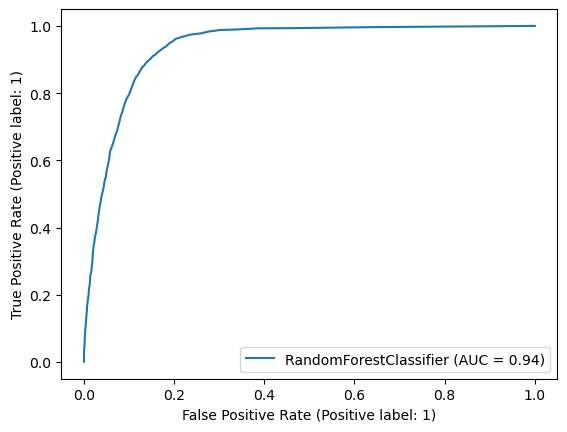

In [22]:
# Visualizing ROC_AUC curves 
roc_auc_plot(model, X_test, y_test, 'basic_auc_plot.png')

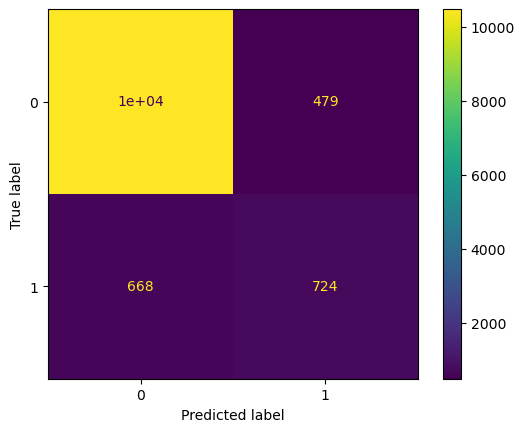

In [23]:
# Visualizing Confusion matrix
confusion_matrix_plot(model, X_test, y_test, 'basic_conf_matix_plot.png')

### Optimizing the above model - Hyperparameter Tunning

In [25]:
def hyper_parameter_tuning(X_train, y_train):
    
    # define random parameters grid
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    classifier = RandomForestClassifier()
    
    #using RandomSearchCV for finding optimal parameters
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 50, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')
    
    # extracting best param values explicitly
    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    # defining tuned model with best params
    tuned_model = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    # training the tuned model
    tuned_model.fit( X_train, y_train)
    
    return tuned_model,best_params

In [26]:
# Creating optimized
optimized_model, best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

# Moking predictions with optimized model
y_pred = predict_on_test_data(optimized_model, X_test) 

# Recording metrics
run_metrics = get_metrics(y_test, y_pred)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ANIKESH\Anaconda3\envs\mlflow_env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 21, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



C:\Users\ANIKESH\Anaconda3\envs\mlflow_env\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


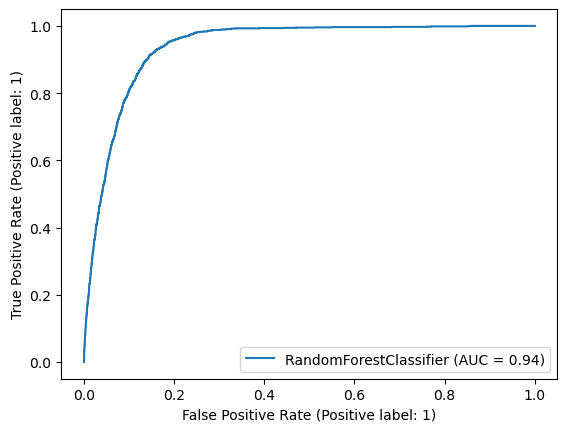

In [27]:
# Visualizing ROC_AUC curves 
roc_auc_plot(optimized_model, X_test, y_test, 'optimal_auc_plot.png')

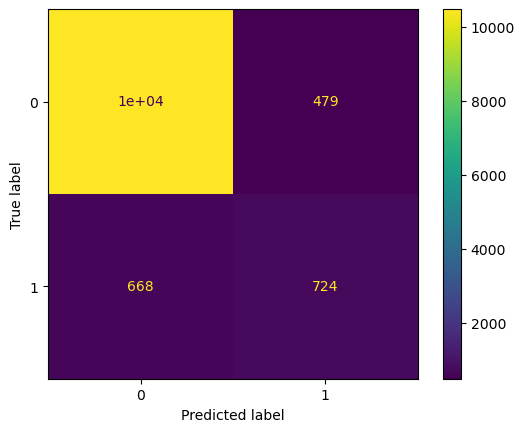

In [28]:
# Visualizing Confusion matrix
confusion_matrix_plot(model, X_test, y_test, 'optimal_confusion_matrix_plot.png')

In [29]:
run_metrics

{'accuracy': 0.91, 'precision': 0.59, 'recall': 0.58}

## 1. MLflow - Basics

### Function for creating an experiment (logging model, parameters, metrics and artifacts)

In [30]:
def create_mlflow_experiment(exp_name,
                             run_name,
                             run_metrics, 
                             model,
                             confusion_matrix_path = None, 
                             roc_auc_plot_path = None,
                             run_params=None):
    import mlflow
    
    #mlflow.set_tracking_uri("http://localhost:5000")    # if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(exp_name)                      # setting name of the Experiment
    
    with mlflow.start_run(run_name = run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])       # logging model parameters if any
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])       # logging metrics
        
        if confusion_matrix_path != None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')       # logging conf_matrix as artifact
            
        if roc_auc_plot_path != None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")                # logging auc_roc_curve as artifact
            
        mlflow.sklearn.log_model(model, "ml_model")              # logging model binaries
        
        mlflow.set_tag("tag1", "Random Forest")                   # giving tags for quick search
            
    print('Run - {0} is logged to Experiment - {1}'.format(run_name, experiment_name))

### Logging the Basic Random Forest Classifier 

In [35]:
# Setting up experiment

experiment_name = "basic_rf_classifier" ##basic classifier
run_name="Run_2"
run_metrics = get_metrics(y_test, y_pred)

print(run_metrics)

{'accuracy': 0.91, 'precision': 0.59, 'recall': 0.58}


In [36]:
create_mlflow_experiment(experiment_name,
                         run_name,
                         run_metrics,
                         model,
                         'basic_conf_matix_plot.png',
                         'basic_auc_plot.png')

Run - Run_2 is logged to Experiment - basic_rf_classifier


### Logging Optimized Random Forest model 

In [37]:
experiment_name = "optimized_model"

run_name="Tuned_run_1"

run_params = best_params

print(run_metrics)

{'accuracy': 0.91, 'precision': 0.59, 'recall': 0.58}


In [38]:
create_mlflow_experiment(experiment_name,
                         run_name,
                         run_metrics,
                         optimized_model,
                         'optimal_confusion_matrix_plot.png', 
                         'optimal_auc_plot.png',
                         run_params)

2023/02/21 16:05:16 INFO mlflow.tracking.fluent: Experiment with name 'optimized_model' does not exist. Creating a new experiment.


Run - Tuned_run_1 is logged to Experiment - optimized_model


## 2. Mlfow - Registering

### Using Relational db as a backend store for logging.

#### _If you have MySQL installed then you can use the below command:_

1. Create a database to use as an MLflow backend tracking server.

`CREATE DATABASE mlflow_tracking_database;`

2. Start MLflow tracking server using MySQL as a backend tracking store.
` mlflow server \
   --backend-store-uri  mysql+pymysql://root@localhost/mlflow_tracking_database \ 
   --default-artifact-root  file:/./mlruns \
   -h 0.0.0.0 
   -p 5000`


3. Set the MLflow tracking uri (within code section).

  mlflow.set_tracking_uri("http://localhost:5000")

#### _If you have sqlite installed then you can use the below command: (we will use this)_

1. Start MLflow tracking server using sqlite as a backend tracking store.

`mlflow server 
    --backend-store-uri sqlite:///mlflow.db 
    --default-artifact-root ./artifacts 
    --host 0.0.0.0 
    --port 5000`


2. Set the MLflow tracking uri (within code section).
    
    mlflow.set_tracking_uri("http://localhost:5000")


You can also follow the official documentation for more information on backend database for model registry

https://www.mlflow.org/docs/latest/model-registry.html#model-registry-workflows

### Logging new experiment

In [39]:
from datetime import datetime

experiment_name = "optimized_model_"+ str(datetime.now().strftime("%d-%m-%y"))

run_name="Tuned_run_01_"+ str(datetime.now().strftime("%d-%m-%y"))

run_params = best_params

print(run_metrics)

{'accuracy': 0.91, 'precision': 0.59, 'recall': 0.58}


In [40]:
create_mlflow_experiment(experiment_name,
                         run_name,
                         run_metrics,
                         optimized_model,
                         'optimal_confusion_matrix_plot.png', 
                         'optimal_auc_plot.png',
                         run_params)

2023/02/21 16:19:47 INFO mlflow.tracking.fluent: Experiment with name 'optimized_model_21-02-23' does not exist. Creating a new experiment.


Run - Tuned_run_01_21-02-23 is logged to Experiment - optimized_model_21-02-23


In [41]:
# Making Predictions using the logged model

import mlflow
logged_model = 'runs:/d66542c69dcd4abfb51866fed1408c11/ml_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Registering the Model

#### Method 1

In [42]:
def create_and_register_mlflow_exp(exp_name,
                                     run_name,
                                     run_metrics, 
                                     model,
                                     registered_model_name,
                                     confusion_matrix_path = None, 
                                     roc_auc_plot_path = None,
                                     run_params=None):
    import mlflow
    
    mlflow.set_tracking_uri("http://localhost:5000")    # if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(exp_name)                      # setting name of the Experiment
    
    with mlflow.start_run(run_name = run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])       # logging model parameters if any
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])       # logging metrics
        
        if confusion_matrix_path != None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')       # logging conf_matrix as artifact
            
        if roc_auc_plot_path != None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")                # logging auc_roc_curve as artifact
            
        mlflow.sklearn.log_model(model, "ml_model", registered_model_name=registered_model_name)      # logging model binaries
        
        mlflow.set_tag("tag1", "Random Forest")                   # giving tags for quick search
            
    print('Run - {0} is logged to Experiment - {1}'.format(run_name, experiment_name))

In [43]:
experiment_name = "optimized model_"+ str(datetime.now().strftime("%d-%m-%y"))

run_name="Tuned_run_03_"+ str(datetime.now().strftime("%d-%m-%y"))

registered_model_name = "new_optimized_model_method_1"

run_params = best_params

create_and_register_mlflow_exp(experiment_name,
                                 run_name,
                                 run_metrics,
                                 optimized_model,
                                 registered_model_name,
                                 'optimal_confusion_matrix_plot.png', 
                                 'optimal_auc_plot.png',
                                 run_params)

2023/02/21 16:24:06 INFO mlflow.tracking.fluent: Experiment with name 'optimized model_21-02-23' does not exist. Creating a new experiment.
Successfully registered model 'new_optimized_model_method_1'.
2023/02/21 16:24:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: new_optimized_model_method_1, version 1


Run - Tuned_run_03_21-02-23 is logged to Experiment - optimized model_21-02-23


Created version '1' of model 'new_optimized_model_method_1'.


#### Method 2

The second way is to use the mlflow.register_model() method, after all your experiment runs complete and when you have decided which model is most suitable to add to the registry. For this method, you will need the run_id as part of the runs:URI argument.


If a registered model with the name doesn’t exist, the method registers a new model, creates Version 1, and returns a ModelVersion MLflow object. If a registered model with the name exists, the method creates a new model version and returns the version object.

In [44]:
with mlflow.start_run(run_name=run_name) as run:
    result = mlflow.register_model(
        "runs:/5e84b4baa86042f3b4f8a1609b66013e/model",
        "optimized model_method_2"
    )

Successfully registered model 'optimized model_method_2'.
2023/02/21 16:26:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: optimized model_method_2, version 1
Created version '1' of model 'optimized model_method_2'.


#### Method 3

And finally, you can use the create_registered_model() to create a new registered model. If the model name exists, this method will throw an MlflowException because creating a new registered model requires a unique name.

_"the method below creates an empty registered model with no version associated"_

In [46]:
client = mlflow.tracking.MlflowClient()

client.create_registered_model("optimized_model_method_3")

<RegisteredModel: creation_timestamp=1676977150114, description='', last_updated_timestamp=1676977150114, latest_versions=[], name='optimized_model_method_3', tags={}>

In [47]:
#the method below creates a new version of the model.
client = mlflow.tracking.MlflowClient()

result = client.create_model_version(
    name="optimized_model_method_3",
    source="5e84b4baa86042f3b4f8a1609b66013e/artifacts/model",
    run_id="5e84b4baa86042f3b4f8a1609b66013e"
)

2023/02/21 16:29:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: optimized_model_method_3, version 1


### Fetching an MLflow Model from the Model Registry 

In [48]:
import mlflow.pyfunc

model_name = "new_optimized_model_method_1"
model_version = 1

In [49]:
# using python fuction to load the model
model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [50]:
# using sklearn api to load the model

sklearn_model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)
y_pred_prob = sklearn_model.predict_proba(X_test)
print(y_pred_prob)

[[0.99426628 0.00573372]
 [0.98202758 0.01797242]
 [1.         0.        ]
 ...
 [0.97985099 0.02014901]
 [0.99699373 0.00300627]
 [0.56165567 0.43834433]]


### Transitioning an MLflow Model’s Stage

In [51]:
client = mlflow.tracking.MlflowClient()

client.transition_model_version_stage(
    name="new_optimized_model_method_1",
    version=1,
    stage="Production"
)

<ModelVersion: creation_timestamp=1676976851959, current_stage='Production', description='', last_updated_timestamp=1676977450708, name='new_optimized_model_method_1', run_id='bc39613863704565b9befa8e455426d0', run_link='', source='mlflow-artifacts:/820182592894603517/bc39613863704565b9befa8e455426d0/artifacts/ml_model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [52]:
model_name = "new_optimized_model_method_1"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


## 3. Mlfow - Serving from Registry

* Run this from command line:- set MLFLOW_TRACKING_URI=http://localhost:5000 
* if in linux use:- export MLFLOW_TRACKING_URI=http://localhost:5000 

In [53]:
mlflow.set_tracking_uri('http://localhost:5000')

### Now run this command from command line
make sure to write the different port - other than the one you used while starting mlflow server
    
  * mlflow models serve --model-uri models:/new_optimized_model_method_1/Production -p 1234 --no-conda

### Making Predictions

In [54]:
# Simple Prediction
import requests

inference_request = {
        "dataframe_records": [list(X_test.iloc[0])]
}

#endpoint = "http://localhost:1234/invocations"                # default endpoint exposed by mlflow serving

endpoint = "http://127.0.0.1:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

{"predictions": [0]}


In [55]:
# Batch Prediction

test_list = X_test.values.tolist()

inference_request = {
        "dataframe_records": test_list
}

#endpoint = "http://localhost:1234/invocations"                # default endpoint exposed by mlflow serving

endpoint = "http://127.0.0.1:1234/invocations"

response = requests.post(endpoint, json=inference_request)

In [56]:
print(response.text)

{"predictions": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

## THANK YOU

In [ ]:
X_test.to_csv('X_test.csv')